<a href="https://colab.research.google.com/github/remixwithkj/Backupmac/blob/main/MOA_Customer_Segements_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mall of America (MoA) Case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [3]:
moa_analytics_df = pd.read_csv('moa_analytics.csv')

In [ ]:
moa_analytics_df.head(10)

,device,session_date,apple_flag,entry_time,exit_time,duration,avg_time_session_update,distinct_ap,distinct_sessions,total_updates,...,session_updates_3_S,session_updates_3_SE,session_updates_3_SW,session_updates_3_W,session_updates_4_E,session_updates_4_NE,session_updates_4_S,session_updates_4_SE,session_updates_outside,session_updates_entrance
0,device:00:ee:bd:c2:2a:2b,11/8/2015,0,2015-11-08 12:17:15.25,2015-11-08 12:23:53.57,398.0,199.0,1,1,3,...,0,0,0,3,0,0,0,0,0,3
1,device:00:ee:bd:c2:2c:93,3/26/2016,0,2016-03-26 14:13:24.45,2016-03-26 18:57:53.54,17069.0,107.0,75,35,160,...,0,0,0,0,0,0,0,0,0,16
2,device:00:ee:bd:c2:2e:ba,11/21/2015,0,2015-11-21 14:17:56.76,2015-11-21 17:06:16.50,10100.0,124.0,33,7,82,...,0,0,0,9,0,0,0,0,3,8
3,device:00:ee:bd:c2:37:17,11/21/2015,0,2015-11-21 20:35:30.40,2015-11-22 00:22:01.44,13591.0,109.0,29,13,125,...,0,0,0,0,80,20,0,2,6,30
4,device:00:ee:bd:c2:37:17,3/21/2016,0,2016-03-21 17:49:45.72,2016-03-21 17:57:55.42,490.0,122.0,3,2,5,...,0,0,0,0,0,0,0,0,1,4
5,device:00:ee:bd:c2:49:ef,1/2/2016,0,2016-01-02 22:41:38.00,2016-01-02 22:56:03.03,865.0,45.0,17,2,20,...,8,0,6,6,0,0,0,0,3,2
6,device:00:ee:bd:c2:67:2a,12/6/2015,0,2015-12-06 14:08:26.79,2015-12-06 15:03:54.57,3328.0,89.0,25,2,38,...,0,0,0,0,2,0,9,5,0,2
7,device:00:ee:bd:c2:67:2a,2/13/2016,0,2016-02-13 11:32:12.51,2016-02-13 20:28:02.12,32150.0,175.0,31,43,184,...,9,0,0,0,0,0,0,0,0,3
8,device:00:ee:bd:c2:67:2a,2/20/2016,0,2016-02-20 15:40:39.14,2016-02-20 20:25:57.48,17118.0,178.0,22,14,97,...,5,0,0,0,0,0,0,0,0,5
9,device:00:f4:6f:6b:9d:eb,12/5/2015,0,2015-12-05 12:52:04.82,2015-12-05 17:39:52.48,17268.0,134.0,71,10,129,...,1,0,0,0,0,0,0,0,0,23


In [5]:
moa_analytics_df.shape

(12621, 108)

In [10]:
moa_analytics_df.iloc[:, 0:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12621 entries, 0 to 12620
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   device                     12621 non-null  object        
 1   session_date               12621 non-null  datetime64[ns]
 2   apple_flag                 12621 non-null  int64         
 3   entry_time                 12621 non-null  object        
 4   exit_time                  12621 non-null  object        
 5   duration                   12614 non-null  float64       
 6   avg_time_session_update    12614 non-null  float64       
 7   distinct_ap                12621 non-null  int64         
 8   distinct_sessions          12621 non-null  int64         
 9   total_updates              12621 non-null  int64         
 10  time_per_distinct_ap       12614 non-null  float64       
 11  distinct_sections_visited  12621 non-null  int64         
 12  dist

### Data Preparation

In [17]:
moa_analytics_df['session_date'] = pd.to_datetime(moa_analytics_df['session_date'],
                                                  format="%m/%d/%Y")

In [18]:
moa_analytics_df.head(10)

,device,session_date,apple_flag,entry_time,exit_time,duration,avg_time_session_update,distinct_ap,distinct_sessions,total_updates,...,session_updates_3_S,session_updates_3_SE,session_updates_3_SW,session_updates_3_W,session_updates_4_E,session_updates_4_NE,session_updates_4_S,session_updates_4_SE,session_updates_outside,session_updates_entrance
0,device:00:ee:bd:c2:2a:2b,2015-11-08,0,2015-11-08 12:17:15.25,2015-11-08 12:23:53.57,398.0,199.0,1,1,3,...,0,0,0,3,0,0,0,0,0,3
1,device:00:ee:bd:c2:2c:93,2016-03-26,0,2016-03-26 14:13:24.45,2016-03-26 18:57:53.54,17069.0,107.0,75,35,160,...,0,0,0,0,0,0,0,0,0,16
2,device:00:ee:bd:c2:2e:ba,2015-11-21,0,2015-11-21 14:17:56.76,2015-11-21 17:06:16.50,10100.0,124.0,33,7,82,...,0,0,0,9,0,0,0,0,3,8
3,device:00:ee:bd:c2:37:17,2015-11-21,0,2015-11-21 20:35:30.40,2015-11-22 00:22:01.44,13591.0,109.0,29,13,125,...,0,0,0,0,80,20,0,2,6,30
4,device:00:ee:bd:c2:37:17,2016-03-21,0,2016-03-21 17:49:45.72,2016-03-21 17:57:55.42,490.0,122.0,3,2,5,...,0,0,0,0,0,0,0,0,1,4
5,device:00:ee:bd:c2:49:ef,2016-01-02,0,2016-01-02 22:41:38.00,2016-01-02 22:56:03.03,865.0,45.0,17,2,20,...,8,0,6,6,0,0,0,0,3,2
6,device:00:ee:bd:c2:67:2a,2015-12-06,0,2015-12-06 14:08:26.79,2015-12-06 15:03:54.57,3328.0,89.0,25,2,38,...,0,0,0,0,2,0,9,5,0,2
7,device:00:ee:bd:c2:67:2a,2016-02-13,0,2016-02-13 11:32:12.51,2016-02-13 20:28:02.12,32150.0,175.0,31,43,184,...,9,0,0,0,0,0,0,0,0,3
8,device:00:ee:bd:c2:67:2a,2016-02-20,0,2016-02-20 15:40:39.14,2016-02-20 20:25:57.48,17118.0,178.0,22,14,97,...,5,0,0,0,0,0,0,0,0,5
9,device:00:f4:6f:6b:9d:eb,2015-12-05,0,2015-12-05 12:52:04.82,2015-12-05 17:39:52.48,17268.0,134.0,71,10,129,...,1,0,0,0,0,0,0,0,0,23


In [19]:
moa_analytics_df.iloc[:, :18].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12621 entries, 0 to 12620
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   device                     12621 non-null  object        
 1   session_date               12621 non-null  datetime64[ns]
 2   apple_flag                 12621 non-null  int64         
 3   entry_time                 12621 non-null  object        
 4   exit_time                  12621 non-null  object        
 5   duration                   12614 non-null  float64       
 6   avg_time_session_update    12614 non-null  float64       
 7   distinct_ap                12621 non-null  int64         
 8   distinct_sessions          12621 non-null  int64         
 9   total_updates              12621 non-null  int64         
 10  time_per_distinct_ap       12614 non-null  float64       
 11  distinct_sections_visited  12621 non-null  int64         
 12  dist

### Are there any missing Values?

In [20]:
nan_cols = moa_analytics_df.columns[moa_analytics_df.isnull().any()]

In [21]:
moa_analytics_df[nan_cols].isnull().sum()

,0
duration,7
avg_time_session_update,7
time_per_distinct_ap,7
time_0,2
time_1,2
time_2,2
time_3,1
time_0_E,1
time_0_SE,1
time_1_E,1


### Dropping the missing values

In [ ]:
moa_analytics_df = moa_analytics_df.dropna()

In [ ]:
moa_analytics_df.columns[moa_analytics_df.isnull().any()]

Index([], dtype='object')

### We have session data for what duration?

In [22]:
moa_analytics_df.session_date.min(), moa_analytics_df.session_date.max()

(Timestamp('2015-10-15 00:00:00'), Timestamp('2016-04-03 00:00:00'))

### We will take data for only 2016

In [23]:
moa_analytics_2016_df = moa_analytics_df[moa_analytics_df.session_date >= '2016-01-01']

In [24]:
moa_analytics_2016_df.shape

(7705, 108)

## Aggregate Statistics

- Number of visits by each customer
- Median duration spent in the mall

In [25]:
visits_duration_df = (moa_analytics_2016_df.groupby('device')
                      .agg({'device':'count', 'duration':'sum'} )
                      .rename(columns={'device':'num_visits','duration':'mean_duration'})
                      .reset_index())

In [26]:
visits_duration_df.shape

(3533, 3)

In [27]:
visits_duration_df.sample(10)

,device,num_visits,mean_duration
2192,device:a8:66:7f:c3:1a:7f,1,2188.0
1113,device:64:a5:c3:d4:24:72,2,6156.0
2834,device:dc:2b:2a:9d:21:ac,2,18688.0
1521,device:7c:01:91:6e:17:aa,1,1165.0
1412,device:70:ec:e4:68:da:5b,1,391.0
2337,device:bc:4c:c4:9f:cf:00,1,8049.0
186,device:0c:3e:9f:30:fb:2c,1,320.0
2869,device:dc:9b:9c:4b:fb:42,1,315.0
3204,device:f4:09:d8:ea:ac:59,1,4761.0
3134,device:f0:99:bf:17:0d:83,1,13930.0


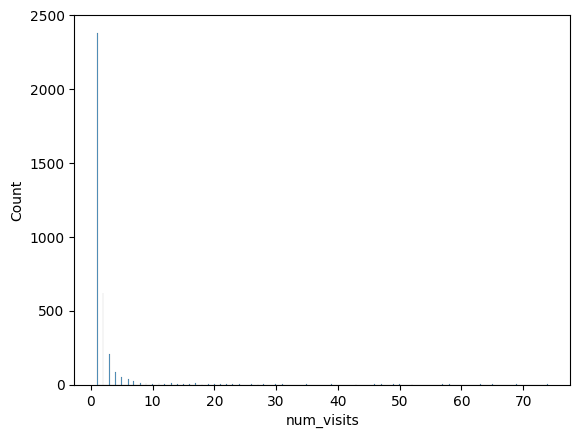

In [28]:
sn.histplot( visits_duration_df.num_visits );

<Axes: xlabel='mean_duration', ylabel='Density'>

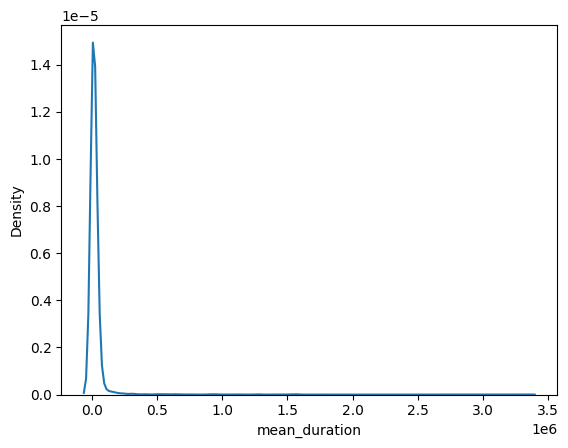

In [29]:
sn.kdeplot( visits_duration_df.mean_duration )

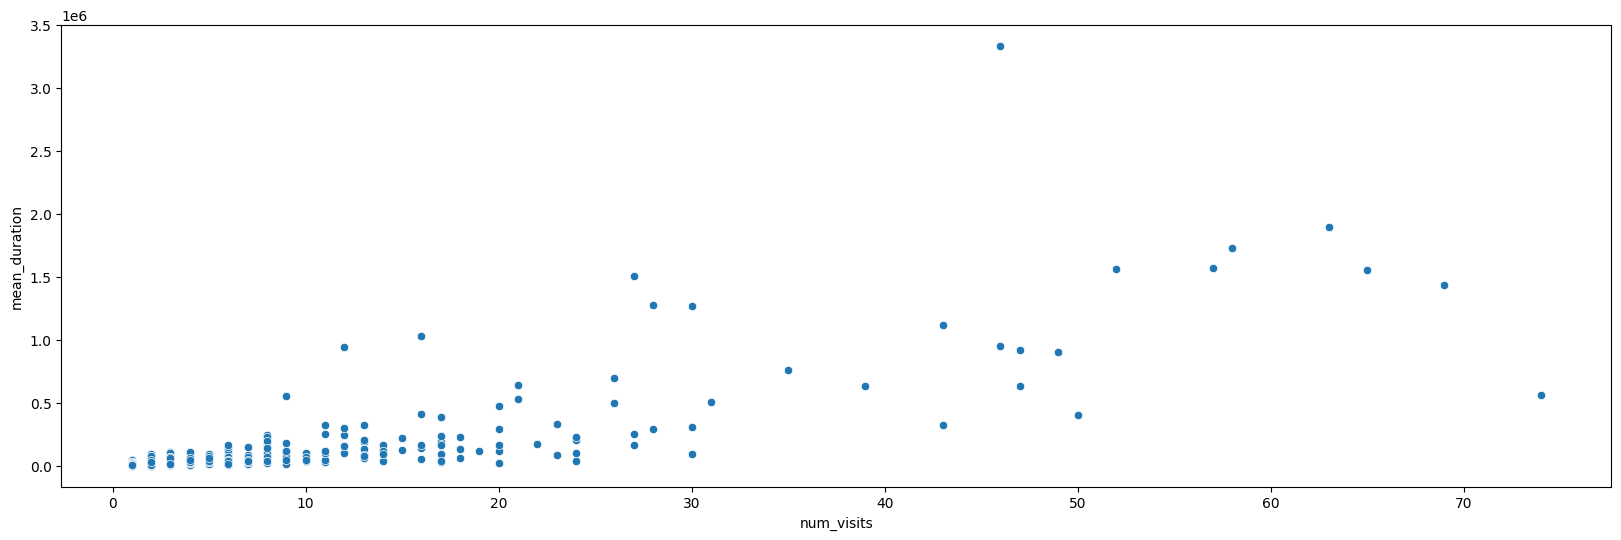

In [30]:
plt.figure(figsize = (20, 6))
sn.scatterplot( data = visits_duration_df,
                x = 'num_visits',
                y = 'mean_duration' );

In [31]:
moa_analytics_2016_df.head(10)

,device,session_date,apple_flag,entry_time,exit_time,duration,avg_time_session_update,distinct_ap,distinct_sessions,total_updates,...,session_updates_3_S,session_updates_3_SE,session_updates_3_SW,session_updates_3_W,session_updates_4_E,session_updates_4_NE,session_updates_4_S,session_updates_4_SE,session_updates_outside,session_updates_entrance
1,device:00:ee:bd:c2:2c:93,2016-03-26,0,2016-03-26 14:13:24.45,2016-03-26 18:57:53.54,17069.0,107.0,75,35,160,...,0,0,0,0,0,0,0,0,0,16
4,device:00:ee:bd:c2:37:17,2016-03-21,0,2016-03-21 17:49:45.72,2016-03-21 17:57:55.42,490.0,122.0,3,2,5,...,0,0,0,0,0,0,0,0,1,4
5,device:00:ee:bd:c2:49:ef,2016-01-02,0,2016-01-02 22:41:38.00,2016-01-02 22:56:03.03,865.0,45.0,17,2,20,...,8,0,6,6,0,0,0,0,3,2
7,device:00:ee:bd:c2:67:2a,2016-02-13,0,2016-02-13 11:32:12.51,2016-02-13 20:28:02.12,32150.0,175.0,31,43,184,...,9,0,0,0,0,0,0,0,0,3
8,device:00:ee:bd:c2:67:2a,2016-02-20,0,2016-02-20 15:40:39.14,2016-02-20 20:25:57.48,17118.0,178.0,22,14,97,...,5,0,0,0,0,0,0,0,0,5
10,device:00:f4:6f:76:9e:78,2016-01-25,0,2016-01-25 15:40:24.46,2016-01-25 19:21:51.98,13287.0,168.0,45,2,80,...,6,10,0,0,18,0,0,0,4,12
11,device:00:f4:6f:9b:f2:a7,2016-01-17,0,2016-01-17 19:10:01.53,2016-01-17 19:18:10.23,489.0,122.0,2,1,5,...,0,0,0,5,0,0,0,0,2,3
12,device:00:f4:6f:a2:ba:a5,2016-01-09,0,2016-01-09 17:30:15.52,2016-01-09 18:23:54.65,3219.0,91.0,20,2,36,...,0,5,0,0,1,0,0,1,8,4
14,device:04:4b:ed:06:7f:e1,2016-01-07,1,2016-01-07 16:14:30.46,2016-01-07 21:22:36.70,18486.0,116.0,50,13,160,...,3,4,0,0,0,0,4,0,2,9
17,device:04:4b:ed:06:ee:68,2016-01-30,1,2016-01-30 11:30:13.51,2016-01-30 15:57:02.28,16009.0,80.0,97,20,199,...,0,0,0,0,0,0,0,0,0,6


In [32]:
levels_time_cols = ['time_0',
                    'time_1',
                    'time_2',
                    'time_3',
                    'time_4']

In [33]:
moa_analytics_2016_df = moa_analytics_2016_df.merge( visits_duration_df , on = 'device')

In [34]:
duration_levels_df = (moa_analytics_2016_df[["device"] + levels_time_cols].groupby('device')
                      .sum()
                      .reset_index())

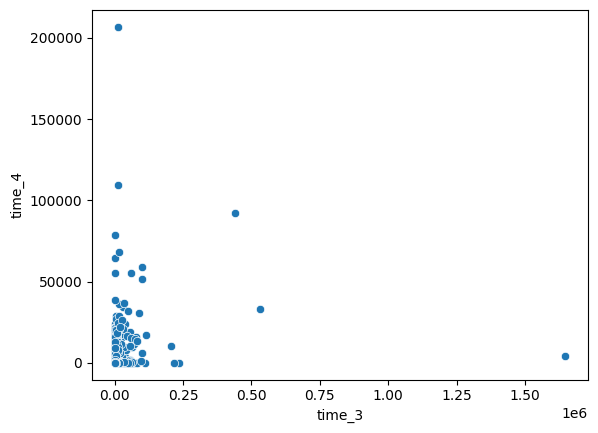

In [35]:
sn.scatterplot(data = duration_levels_df,
               x = 'time_3',
               y = 'time_4' );

## Transforming the features

- Number of visits by each customer
- Median duration spent in the mall

In [36]:
from sklearn.preprocessing import power_transform

In [37]:
levels_time_transformed = power_transform(duration_levels_df[levels_time_cols] + 1,
                                          method='box-cox',
                                          standardize=False)

In [38]:
levels_time_transformed_df = pd.DataFrame(levels_time_transformed, columns=levels_time_cols)

In [39]:
levels_time_transformed_df.head(5)

,time_0,time_1,time_2,time_3,time_4
0,0.000000,14.504845,0.000000,0.000000,0.000000
1,0.000000,11.829779,0.000000,0.000000,0.000000
2,0.000000,13.855315,6.992956,16.774879,0.000000
3,0.857092,32.103434,11.436968,28.655541,2.349124
4,0.000000,23.518055,8.835034,16.564918,3.171399


In [40]:
duration_levels_df.sample(10)

,device,time_0,time_1,time_2,time_3,time_4
2138,device:a4:c3:61:0b:9d:ef,0.0,8743.0,468.0,3046.0,0
3512,device:fc:db:b3:fc:72:4d,0.0,0.0,0.0,1392.0,0
140,device:08:74:02:04:fa:75,0.0,6226.0,112.0,904.0,0
2970,device:e8:80:2e:a1:ae:2b,0.0,3787.0,846.0,1168.0,0
2559,device:cc:20:e8:05:07:d6,11750.0,6348.0,18125.0,13909.0,1941
463,device:28:e1:4c:06:7d:ce,0.0,6431.0,474.0,0.0,0
447,device:28:5a:eb:4e:fb:a7,0.0,2850.0,443.0,66.0,0
1590,device:84:38:35:6a:c9:fd,0.0,319.0,0.0,0.0,0
3515,device:fc:e9:98:36:af:0f,0.0,11572.0,4919.0,18805.0,22109
3229,device:f4:0e:22:5b:a2:5e,0.0,6148.0,7701.0,160.0,32


In [ ]:
#duration_levels_df['num_visits'] = (duration_levels_df['num_visits']
#                                    .apply(lambda x: (x - min_visits) / (max_visits - min_visits)))

In [41]:
duration_levels_df.sample(10)

,device,time_0,time_1,time_2,time_3,time_4
138,device:08:3d:88:a1:ec:43,0.0,5746.0,27.0,2835.0,0
1638,device:88:1f:a1:73:cd:1b,0.0,6390.0,0.0,327.0,383
2831,device:dc:2b:2a:9d:0c:b9,0.0,13502.0,3576.0,26899.0,3426
2815,device:dc:2b:2a:45:bf:bc,0.0,759.0,992.0,395.0,0
1839,device:94:e9:6a:96:78:e4,0.0,331.0,0.0,0.0,0
2767,device:d8:1d:72:43:a4:d5,0.0,0.0,0.0,0.0,21143
1357,device:70:3e:ac:5e:01:25,1297.0,9494.0,4458.0,5627.0,111
582,device:34:af:2c:ec:62:f8,0.0,352.0,3250.0,4634.0,0
3196,device:f4:09:d8:a6:ca:98,0.0,720.0,0.0,3587.0,1307
3396,device:fc:c2:de:a8:9f:28,0.0,70.0,1962.0,39.0,0


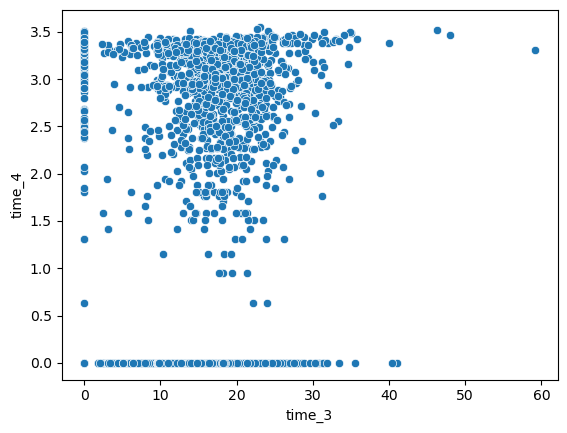

In [ ]:
sn.scatterplot(data = levels_time_transformed_df,
               x = 'time_3',
               y = 'time_4' );

## Clustering

In [ ]:
from sklearn.cluster import DBSCAN, HDBSCAN

In [ ]:
#hdbscan = DBSCAN(eps = 0.55, min_samples = 5, p = 4)

In [ ]:
hdbscan = HDBSCAN(min_cluster_size=50)

In [ ]:
hdbscan.fit(levels_time_transformed_df)

HDBSCAN(min_cluster_size=50)

In [ ]:
np.unique(hdbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5])

In [ ]:
duration_levels_df['cluster_id'] = hdbscan.labels_

In [ ]:
duration_levels_df.cluster_id.value_counts()

cluster_id
 1    1707
-1     920
 4     326
 3     267
 0     141
 2     100
 5      72
Name: count, dtype: int64

### Analyzing the clusters

<Axes: xlabel='cluster_id', ylabel='time_0'>

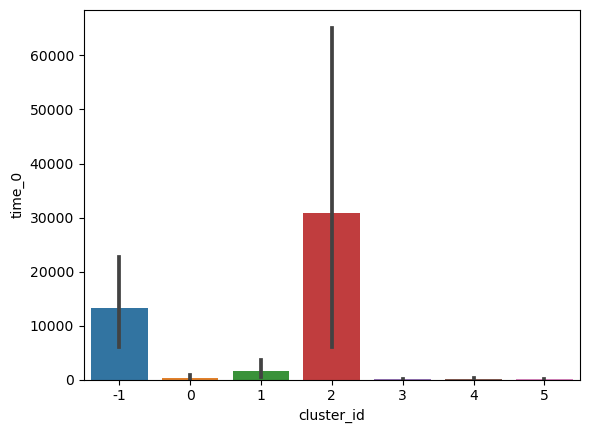

In [ ]:
sn.barplot( data = duration_levels_df,
            x = 'cluster_id',
            y = 'time_0',
            estimator = 'mean')

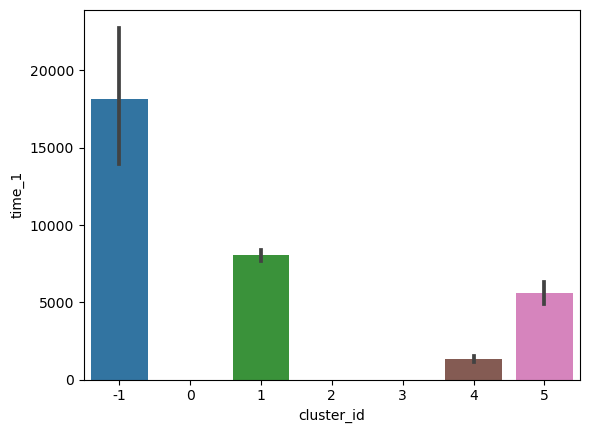

In [ ]:
sn.barplot( data = duration_levels_df,
            x = 'cluster_id',
            y = 'time_1',
            estimator = 'mean');

In [ ]:
duration_levels_df

,device,time_0,time_1,time_2,time_3,time_4,cluster_id
0,device:00:25:00:4c:70:ad,0.0,1250.0,0.0,0.0,0,4
1,device:00:56:cd:02:8a:05,0.0,564.0,0.0,0.0,0,4
2,device:00:56:cd:0b:c6:84,0.0,1041.0,188.0,2995.0,0,1
3,device:00:56:cd:10:f7:17,5494.0,41336.0,1824.0,37224.0,41,-1
4,device:00:56:cd:cd:80:a1,0.0,9823.0,516.0,2833.0,1412,1
...,...,...,...,...,...,...,...
3528,device:fc:e9:98:c6:2f:6a,0.0,3504.0,49.0,1878.0,366,1
3529,device:fc:e9:98:cc:1a:30,394.0,2315.0,0.0,554.0,330,-1
3530,device:fc:e9:98:da:e4:43,0.0,2799.0,8126.0,0.0,0,-1
3531,device:fc:f8:ae:5a:2d:e1,0.0,0.0,0.0,2685.0,0,3


In [ ]:
levels_unpivot_df = pd.melt(duration_levels_df[['cluster_id',
                                                'time_0',
                                                'time_1',
                                                'time_2',
                                                'time_3']],
                            id_vars=['cluster_id'],
                            value_vars = ['time_0',
                                          'time_1',
                                          'time_2',
                                          'time_3'])

In [ ]:
levels_unpivot_df

,cluster_id,variable,value
0,4,time_0,0.0
1,4,time_0,0.0
2,1,time_0,0.0
3,-1,time_0,5494.0
4,1,time_0,0.0
...,...,...,...
14127,1,time_3,1878.0
14128,-1,time_3,554.0
14129,-1,time_3,0.0
14130,3,time_3,2685.0


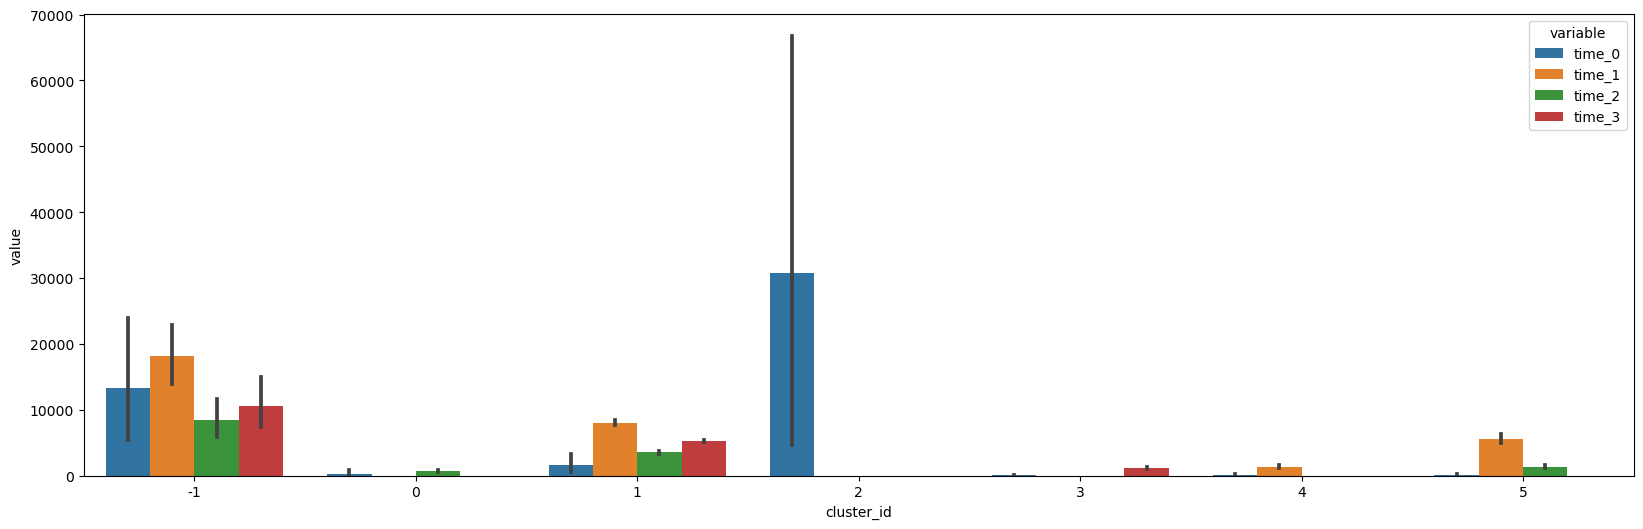

In [ ]:
plt.figure(figsize = (20, 6))
sn.barplot( data = levels_unpivot_df,
            x = 'cluster_id',
            y = 'value',
            hue = 'variable',
            estimator = 'mean');

### K-Means Cluster

In [ ]:
#!pip install yellowbrick

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

In [ ]:
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10), locate_elbow=False, timings=False)

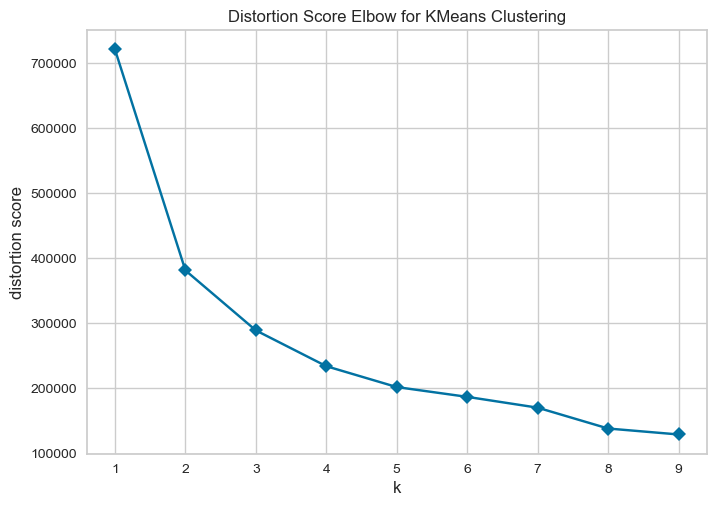

In [ ]:
visualizer.fit(levels_time_transformed_df)
visualizer.show();

In [ ]:
from sklearn.metrics import calinski_harabasz_score

In [ ]:
cluster_range = range( 4, 8 )
ch_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( levels_time_transformed_df )
  print(f"n_cluster: {num_clusters} - CH Score: {calinski_harabasz_score(levels_time_transformed_df, clusters.labels_)}" )

n_cluster: 4 - CH Score: 2443.7184020582226
n_cluster: 5 - CH Score: 2288.4417768680446
n_cluster: 6 - CH Score: 2161.9699704637073
n_cluster: 7 - CH Score: 2116.336835037717


In [ ]:
kmeans_clusters = KMeans(n_clusters = 4, n_init='auto')

In [ ]:
kmeans_clusters.fit(levels_time_transformed_df)

KMeans(n_clusters=4, n_init='auto')

In [ ]:
np.unique(kmeans_clusters.labels_)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
duration_levels_df['kmeans_cluster_id'] = kmeans_clusters.labels_

In [ ]:
duration_levels_df['kmeans_cluster_id'].value_counts()

kmeans_cluster_id
0    1188
2     976
1     685
3     684
Name: count, dtype: int64

In [ ]:
kmeans_levels_unpivot_df = pd.melt(duration_levels_df[['kmeans_cluster_id'] + levels_time_cols],
                                   id_vars=['kmeans_cluster_id'],
                                   value_vars = ['time_0', 'time_1', 'time_2', 'time_3'])

In [ ]:
kmeans_levels_unpivot_df

,kmeans_cluster_id,variable,value
0,3,time_0,0.0
1,3,time_0,0.0
2,0,time_0,0.0
3,2,time_0,5494.0
4,2,time_0,0.0
...,...,...,...
14127,0,time_3,1878.0
14128,0,time_3,554.0
14129,3,time_3,0.0
14130,1,time_3,2685.0


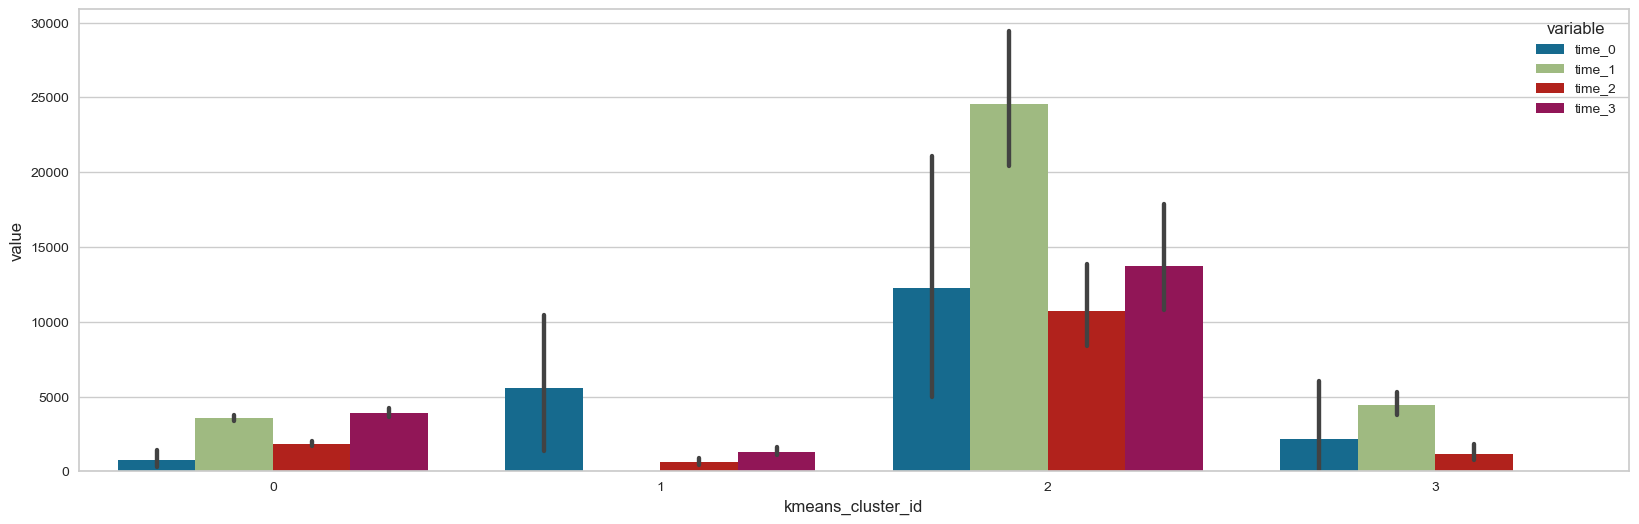

In [ ]:
plt.figure(figsize = (20, 6))
sn.barplot( data = kmeans_levels_unpivot_df,
            x = 'kmeans_cluster_id',
            y = 'value',
            hue = 'variable',
            estimator = 'mean');